In [20]:
#установка библиотек
#!pip install psycopg2
#!pip install plotly

In [174]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
#Библиотека ждя визуализации
from IPython.display import HTML
import plotly.express as px

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DB_HOST = '52.157.159.24'
DB_USER = 'student5'
DB_USER_PASSWORD = 'student5_password'
DB_NAME = 'sql_ex_for_student5'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

cur = conn.cursor()

In [45]:
# task7 (lesson4)
# По предыдущему view (count_products_by_makers) сделать график в colab (X: maker, y: count)

df = pd.read_sql_query("""select * from count_products_by_makers""", conn)
fig = px.bar(x = df.maker.to_list(), y = df.qty.to_list(), labels={'x':'maker', 'y':'qty'}, width=500, height=300)
fig.show()

In [79]:
# task11 (lesson4)
# Корабли: По предыдущему view (sunk_ships_by_classes) сделать график в colab (X: class, Y: count)

df = pd.read_sql_query("""select * from sunk_ships_by_classes_2""", conn)
fig = px.bar(x = df.cl.to_list(), y = df.qty.to_list(), labels={'x':'class', 'y':'qty'}, width=500, height=300)
fig.show()

In [87]:
# task13 (lesson4)
# Корабли: Сделать график в colab по таблице classes с количеством классов по странам (X: country, Y: count)

df = pd.read_sql_query("""select country, count(*) as qty from classes group by country""", conn)
fig = px.bar(x = df.country.to_list(), y = df.qty.to_list(), labels={'x':'country', 'y':'count'}, width=500, height=300)
fig.show()

In [94]:
# task16 (lesson4)
# Корабли: Построить график с количеством запущенных на воду кораблей и годом запуска (X: year, Y: count)

df = pd.read_sql_query("""select launched, count(*) as qty from ships group by launched order by launched""", conn)
fig = px.bar(x = df.launched.to_list(), y = df.qty.to_list(), labels={'x':'year', 'y':'count'}, width=500, height=300)
fig.show()

In [107]:
# task10 (lesson4)
# Компьютерная фирма: На базе products_price_categories_with_makers по строить по каждому производителю
# график (X: category_price, Y: count)

# df = pd.read_sql_query("""select category_price, count as qty from products_price_categories_with_makers
#                         where maker = 'A'""", conn)
# fig = px.bar(x = df.category_price.to_list(), y = df.qty.to_list(), labels={'x':'category_price', 'y':'count'}, width=500, height=300)
# fig.show()

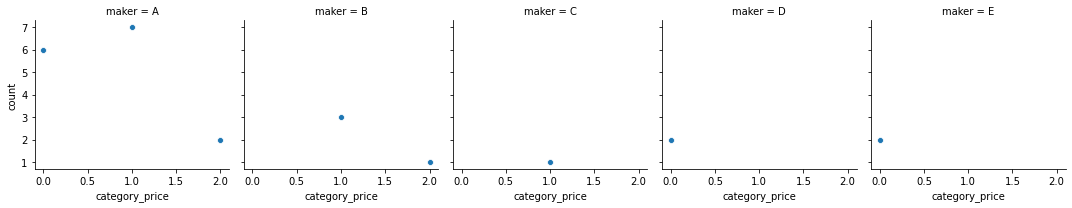

In [134]:
# task10 (lesson4)
# Компьютерная фирма: На базе products_price_categories_with_makers по строить по каждому производителю
# график (X: category_price, Y: count)

df = pd.read_sql_query("""select * from products_price_categories_with_makers""", conn)
maker_sort = ['A', 'B', 'C', 'D', 'E']
sns.relplot(
    x = 'category_price',
    y = 'count',
    col = 'maker',
    col_wrap = 5,
    col_order = maker_sort,
    data = df_2,
    height = 3
);

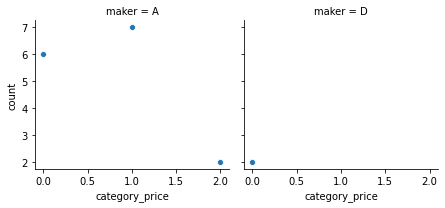

In [182]:
# task11 (lesson4)
# Компьютерная фирма: На базе products_price_categories_with_makers по строить по A & D график (X: category_price, Y: count)

df = pd.read_sql_query("""select * from products_price_categories_with_makers_2 where maker in ('A' ,'D')
                            order by maker""", conn)

maker_sort = ['A', 'D']
sns.relplot(
    x = 'category_price',
    y = 'count',
    col = 'maker',
    col_wrap = 5,
    col_order = maker_sort,
    data = df_2,
    height = 3
);